In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
#pip install plotly 설치
import plotly

In [3]:
plotly.__version__

'5.1.0'

# plotly 기초 실습

### 1. jupyter notebook에서 plotly 사용을 위한 설정

In [4]:
# Jupyter setup
# offline 모드로 jupyter notebook에서 plotly를 사용하기 위한 설정
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

### 2. plotly의 graph_objects와 express

In [5]:
df = DataFrame({
  "과일": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "참가자": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "먹은 갯수": [2, 1, 3, 1, 3, 2],
})
df

,과일,참가자,먹은 갯수
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [6]:
import plotly.graph_objects as go # plotly에서 제공하는 그리기 객체
fig = go.Figure()
for contestant, group in df.groupby("참가자"):
    fig.add_trace(go.Bar(x=group["과일"], y=group["먹은 갯수"], name=contestant,
      hovertemplate="참가자=%s<br>과일=%%{x}<br>먹은 갯수=%%{y}<extra></extra>"% contestant))
fig.update_layout(legend_title_text = "참가자")
fig.update_xaxes(title_text="과일")
fig.update_yaxes(title_text="먹은 갯수")
fig.show()

In [7]:
import plotly.express as px
fig = px.bar(df, x="과일", y="먹은 갯수", color="참가자", barmode="group")
fig.show()

### 3. plotly.express 살펴보기
 - https://plotly.com/python/plotly-express/ 


#### 3.1 Bar chart with Plotly Express

In [8]:
# 샘플 코드 from plotly 홈페이지
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'") # 데이터 가져오기
fig = px.bar(data_canada, x='year', y='pop') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()

- [실습 #1] 위 실습 코드를 참고하여, 한국과 미국와 GDP를 비교

In [9]:
data = px.data.gapminder()
data

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [10]:
data2=data[data.country.isin(['Korea, Rep.','United States'])]
#'Korea, Rep.','United States'

In [11]:
fig = px.bar(data2, x='year', y='gdpPercap',
             color='country',barmode='group',
            title='GDP- US vs KOREA') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()

#### 3.2 Customize bar chart with Plotly Express

In [12]:
# 샘플 코드 from plotly 홈페이지
import plotly.express as px
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
fig = px.bar(data_canada, x='year', y='pop', barmode = 'group',
             hover_data=['lifeExp', 'gdpPercap'], color='lifeExp', 
             labels={'pop':'population of Canada'}, height=400)
fig.show()

- [실습 #2] 실습 1. 그래프에 hover_data에 lifeExp를 추가하고, x축, y축, 라벨의 이름을 각각 GDP, 년도, 나라로 변경

In [13]:
fig = px.bar(data2, x='year', y='gdpPercap',
             color='country',barmode='group',
             hover_data=['lifeExp'],
             labels={'year':'년도',
                    'gdpPercap':'GDP',
                    'country':'나라'},
            title='GDP- US vs KOREA') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()

#### 3.3 faceted subplots 

In [14]:
import plotly.express as px
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group",
             facet_row="time", facet_col="day",
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]})
fig.show()

- [실습 #3] 실습 2. 그래프를 korea와 US 각각의 그래프로 표현하시오.

### 4. plotly를 pandas에서 손쉽게 사용하기
 - backend를 변경하기


In [15]:
# matplotlib 스타일로 막대그래프로 표현해보기

In [16]:
fig = px.bar(data2, x='year', y='gdpPercap',barmode='group',
             facet_row='country',
             hover_data=['lifeExp'],
             labels={'year':'년도',
                    'gdpPercap':'GDP',
                    'country':'나라'},
            title='GDP- US vs KOREA') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()

array([<AxesSubplot:title={'center':'Korea, Rep.'}, xlabel='year'>,
       <AxesSubplot:title={'center':'United States'}, xlabel='year'>],
      dtype=object)

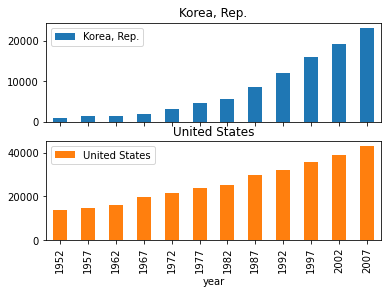

In [17]:
data2.set_index(['year','country'])['gdpPercap'].unstack().plot(kind='bar',subplots=True)

In [18]:
# pandas의 시각화 backend를 plotly로 변경

In [19]:
pd.options.plotting.backend = 'plotly'
# backend를 plotly로 설정
# 어떤 backnd를 사용하느냐에 따라, 동일한 DataFrame의 plqot() 함수라 하더라도, 인자가 달라진다. 

In [20]:
# backend가 matplotlib일 때의 코드는 정상적으로 동작하지 않는다.  
data2

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226,KOR,410
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537,KOR,410
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387,KOR,410
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142,KOR,410
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650,KOR,410
845,"Korea, Rep.",Asia,1977,64.766,36436000,4657.221020,KOR,410
846,"Korea, Rep.",Asia,1982,67.123,39326000,5622.942464,KOR,410
847,"Korea, Rep.",Asia,1987,69.810,41622000,8533.088805,KOR,410
848,"Korea, Rep.",Asia,1992,72.244,43805450,12104.278720,KOR,410
849,"Korea, Rep.",Asia,1997,74.647,46173816,15993.527960,KOR,410


In [21]:
fig = data2.plot(kind='bar',x='year', y='gdpPercap',barmode='group',
             facet_row='country',
             hover_data=['lifeExp'],
             labels={'year':'년도',
                    'gdpPercap':'GDP',
                    'country':'나라'},
            title='GDP- US vs KOREA') # X축은 year, y축은 pop으로 해서 막대 그래프 그리기
fig.show()